# FYS-STK4155 – Project 1: Regression analysis and resampling methods

##### Authors: Adele Zaini, Gaute Arnesson Holen, Fridtjof Gjengset
##### Date: 11. October, 2021

## Before we start: 

### General introduction

In this first project we are asked to explore the techniques of Linear Regression, as the basic step to go further deeply into Machine Learning.

We started working with a vanilla dataset given by the Franke function, depending of two indenpendent variables $x$ and $y$, in order to set up all our linear regression methods. At the end, we performed the code with a real dataset taken from a terrain survey.

Franke function is a weighted sum of four exponentials:

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function is defined for $x,y\in [0,1]$.

To access the quality of the model, we perfom an error analysis, usually involving the Mean Square Error ($MSE$) and the $R^2$ score function:

$$
MSE(\hat{y},\hat{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

$$
R^2(\hat{y}, \tilde{\hat{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where $\tilde{\hat{y}}_i$ is the predicted value of the $i-th$ sample, $y_i$ is the corresponding true value and $\hat{y}$ is the mean value given by $ \bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i$.

[...]


### Code structure

The code is structured into libraries (e.g. `regression.py`), which gather all the functions needed for solving the various tasks, while the specific task codes are in `task*.py` files.

In the course of this notebook, we inserted runnable cells to run the task codes directly and dynamically from here to show up the results.

After a brief introduction, we will explain the algorithm, show the results and comment on them.

*Note: a further improvement to the code would be structuring as object-oriented. We have started converting the code in a new branch.*


## Exercise 1: Ordinary Least Square (OLS) on the Franke function

### Introduction

### Algorithm

After setting up our vanilla dataset using the FrankeFunction with two indipendent variables, we perfom a Ordinary Least Square regression.
We structured the code with all the useful functions in a library called 'linear_regression.py', while specific analysises due for the exercise are in 'task1.py'.

The implemented functions are the following:

- **create_X**(x,y,n) : Creates the designmatrix with a complexity n.
- **Frankefunction**(x,y) : Calculates the frankefunction fro the values x and y.
- **Plot_frankefunction**(z,y,z) : Creates a 3d plot
- **Split_and_Scale**(X,z,test_size, scale) : Splits the dataset using **train_test_split** from scikit learn, into a test_size which has default value set to *0.2*. Scales the data using **StandardScalar()** if boolean argument *scale=True*(it's default value). 
- **OLS_solver**(X_train, X_test, z_train, z_test) : Which calculates the optimal $\hat{\beta}$ values through matix inversion and returns these values, as well as our model $\tilde{z}$ and out prediction. 
- **MSE**(y_data, y_model) : calculates the mean square error of a dataset compared to a model or prediction.
- **R2**(y_data,y_model) : calculates the R2 score of a dataset compared to a model or prediction.

After splitting the data using **Split_and_Scale()**, we find the OLS using **OLS_solver()** on the Frankefunction by matrix inversion. 


We start by simply importing the functions and creating the dataset, as well as adding some noise to the dataset:


In [1]:
import numpy as np
from random import random, seed
from regression import FrankeFunction, Plot_FrankeFunction

# Create vanilla dataset:
np.random.seed(1234)

n = 25

x = np.linspace(0,1,n)
y = np.linspace(0,1,n) 
x, y = np.meshgrid(x,y)

sigma_N = 0.1; mu_N = 0 
z = FrankeFunction(x,y) +mu_N+sigma_N*np.random.randn(n,n)

Plot_FrankeFunction(x,y,z, title="Original noisy dataset")


ModuleNotFoundError: No module named 'regression'

Above, we see a plot of the frankefunction with some added noise. Having $\sigma = 0.1$ seems to be a reasonable amount of noise, by looking at the plot. 

We can know create the designmatrix, for a polynomial up to the 5th order. We also want to split and scale the dataset, so we can make our model and prediction.

We do not **have** to scale this dataset as we're not working with a lot of different units. If we imagine this to be terrain data, all the data in the set could be mesured in meteres. However, we use boolean as an argument to quickly be able to enable or disable scaling. We decided to scale the data for more adaptive code that can be reused for other purposes(Adele agree?).

To create the designmatrix, as well as to split and scale out data, we run the following lines:

In [ ]:
degree=5

X = create_X(x, y, degree)
X_train, X_test, z_train, z_test = Split_and_Scale(X,np.ravel(z)) #StardardScaler, test_size=0.2, scale=true

As we now have our training and test data seperated we can go on to find the optimal $\hat{\beta}$ values for the training set, as well as our model and prediction. We do this using **OLS_solver()** which calculates $\hat{\beta}$ through matrix inversion:

$$\hat{\beta}^{OLS} = (X^T X)^{-1}X^T z$$

Where X is the designmatrix for the traindata and z is the training datapoints from the frankefunction. To avoid problems arising from singular matrices, we use the **pinv()** function to find the psudoinverse.

This yields both our model and the prediction by
$$\tilde{z} = X \hat{\beta}$$
Where X is the designmatrix for the training data to produce our model, and the designmatrix for our test data to produce out prediction. 

We run the following line to find our result:

In [ ]:
ols_beta, z_tilde,z_predict = OLS_solver(X_train, X_test, z_train, z_test)

As we now have our model and prediction we can go on to calculate the mean square error and the R2 score for both our model and presdiction:

Finally, we know that the confidence interval of beta can be found by:
$$var(\beta) = \sigma^2 (X^T X)^{-1}$$
Where $\sigma$ si our deviation from the dataset, and X is the designmatrix for the training data.

We can therefore calculate the confidence interval in the following way:


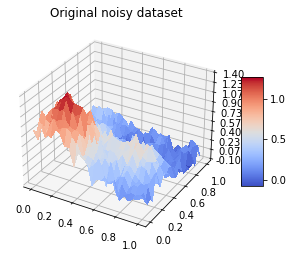

––––––––––––––––––––––––––––––––––––––––––––
Train MSE: 0.0113
Test MSE: 0.0111
––––––––––––––––––––––––––––––––––––––––––––
Train R2: 0.8808
Test R2: 0.8678
––––––––––––––––––––––––––––––––––––––––––––
Confidence interval of β-estimator at 95 %:


,$β_{-}$,$β_{ols}$,$β_{+}$
0,0.000,0.000,0.000
1,6.021,6.024,6.027
2,2.776,2.778,2.781
3,-27.426,-27.413,-27.400
4,-11.607,-11.596,-11.586
5,-4.559,-4.545,-4.531
6,38.309,38.339,38.369
7,34.419,34.441,34.463
8,17.549,17.572,17.595
9,-16.040,-16.009,-15.978


––––––––––––––––––––––––––––––––––––––––––––


In [5]:
%run ../1project/task1.py

Above we can see the confidence interval for our estimators with a 95% certainty. 


## Exercise 2:

We can reproduce figure. 2.11 from Hastie, Tibshiani and Friedman, by plotting the MSE as a function of the complexity of the model. By using the same x, y and z values, we calculate the designmatrix **X** with a complexity from n=2 to n=20, where n is the compexity/degree og the polynomial. For each designmtrix we find the OLS and calcualte the MSE for the test and training data. We import the function **plot_ols_complexity**(x, y, z, complexity) from the linear_regression library, which does exactly this. It's default valye for complexity is set to **range(2,20)**. After importing **plot_ols_complexity()** we can therefore simply write:



In [ ]:
from regression import plot_ols_complexity
complexity = range(2,20)
plot_ols_complexity(x,y,z,complexity)

Initially the MSE for both test and train decreases as out model imporves with the complexity of the polynomial. Around a polynomial of the 5th degree, we can see that the MSE for the test data increases, while the MSE for the train data continues to decrease. This is beacuse the increased complexity of the designmatrix causes overfitting. Out model therefore fits the training data better, but gives a poor model for the test data, because it has overfitted to the training set. It seems out model does best around a complexity of n=5.


Part 1: MSE_train and MSE_test in function of the complexity of the model (degree-order of polynomial) 



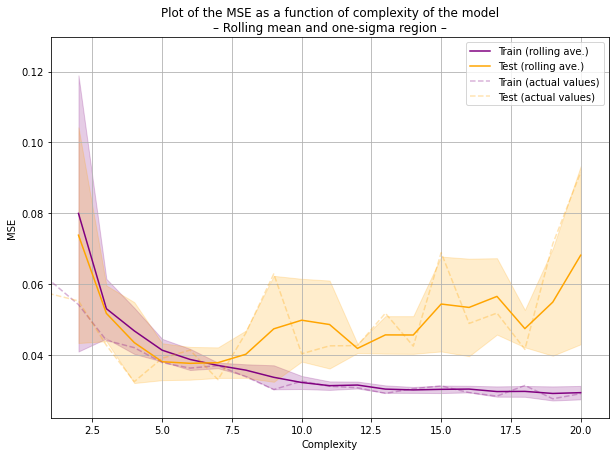

Part 2: perform a bias-variance tradeoff analysis 

Train datapoints: 500
Test datapoints: 125


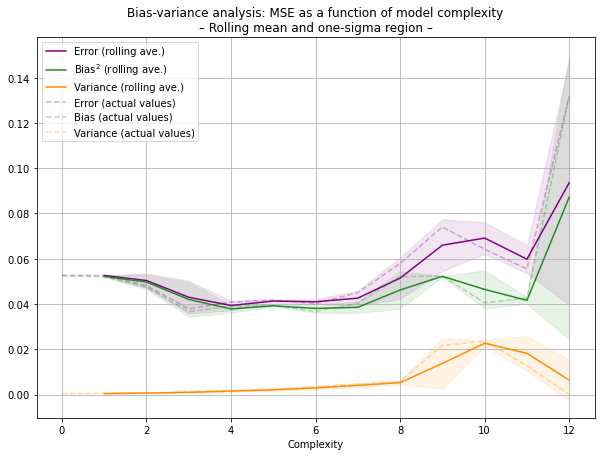

Bias-variance tradeoff analysis with variation in training and testing datapoints
0 ) Datapoints: 625 – Test size: 0.2
1 ) Datapoints: 625 – Test size: 0.33
2 ) Datapoints: 1600 – Test size: 0.2
3 ) Datapoints: 1600 – Test size: 0.33


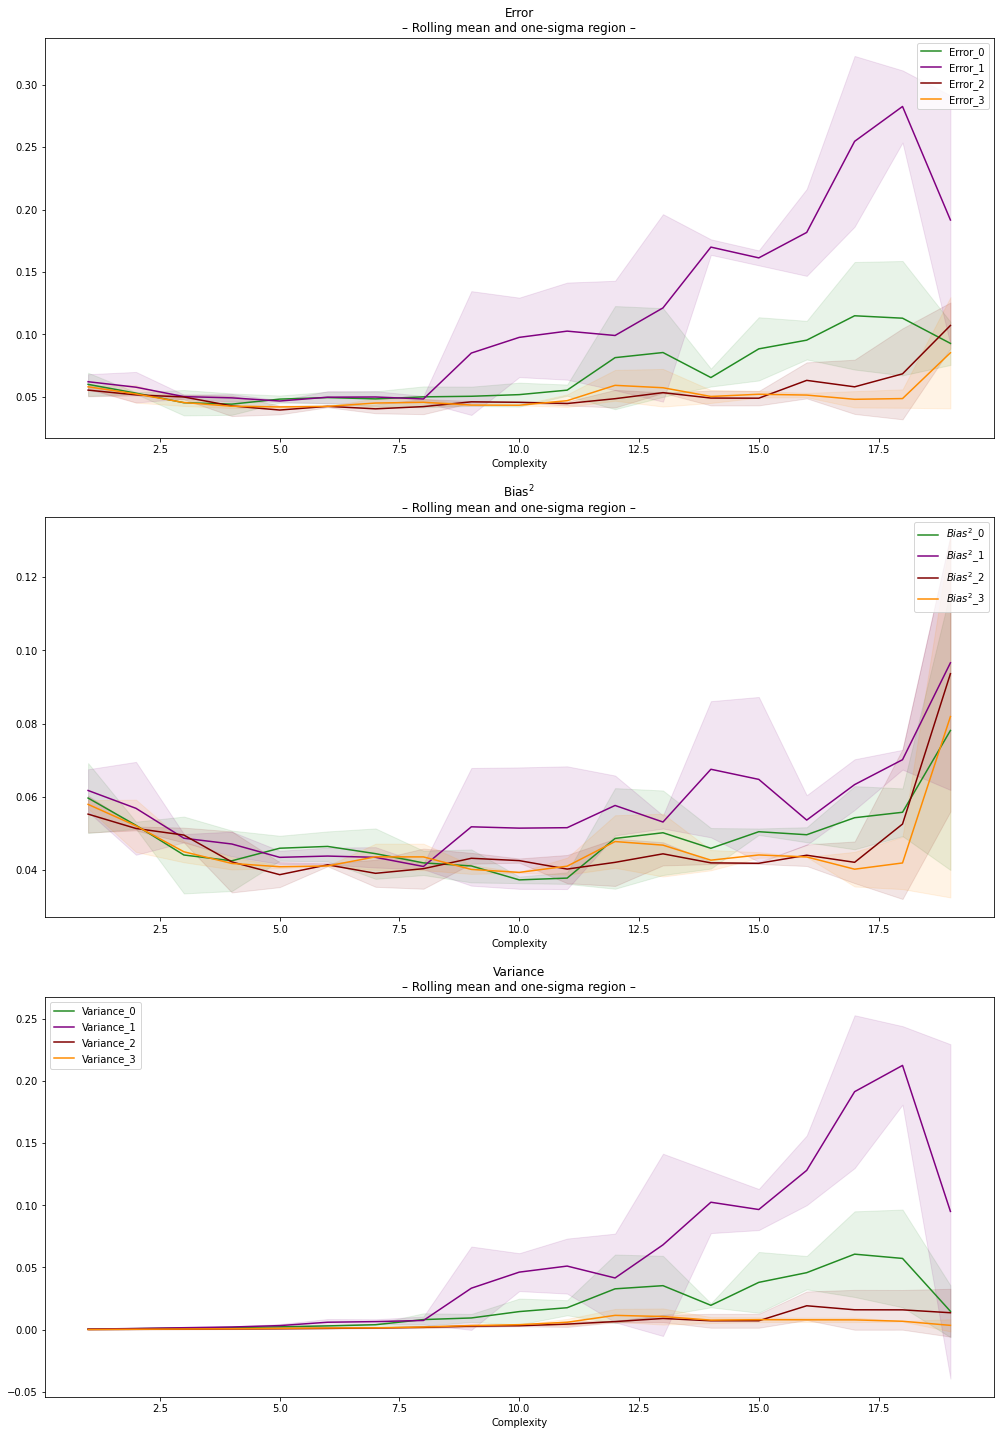

In [2]:
%run ../1project/task2.py

## Exercise 3:

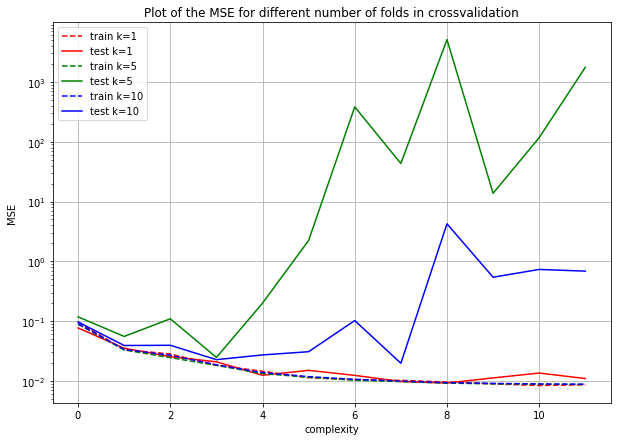

In [1]:
%run ../1project/task3.py

## Exercise 4:

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.565876325827615, tolerance: 0.006239633377892708
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.565825496872483, tolerance: 0.006239633377892708
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.56557674602781, tolerance: 0.006239633377892708
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

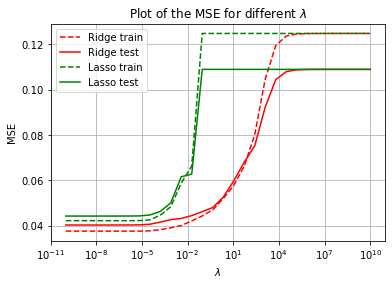

In [3]:
%run ../1project/task4.py

## Exercise 5:

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first l

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first l

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first l

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.67000740294657, tolerance: 0.005573460243507237
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.67000740294657, tolerance: 0.005573460243507237
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.796025380618833, tolerance: 0.0059989524460078774
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.127568757384761, tolerance: 0.006042658045367555
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.127568757384761, tolerance: 0.006042658045367555
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.322476399169823, tolerance: 0.006244144298615169
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.53703457236431, tolerance: 0.005785878881136434
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.807437045182903, tolerance: 0.005922544440305417
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.95491576021643, tolerance: 0.005922544440305417
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.986974834746741, tolerance: 0.0054027913360451246
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.927394423167478, tolerance: 0.0062875277157363975
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.462569585535832, tolerance: 0.006308705513048525
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.814325180085154, tolerance: 0.005492343977927406
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.02386089385098, tolerance: 0.005924526231207415
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.20554698996243, tolerance: 0.005924526231207415
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.3588264908153, tolerance: 0.005998673124597886
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.29047654599701, tolerance: 0.006431859069683337
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.29047654599701, tolerance: 0.006431859069683337
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklear

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.502895309783366, tolerance: 0.005938545603668359
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4923205065788672, tolerance: 0.005938545603668359
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.502895309783366, tolerance: 0.005938545603668359
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.879633717116386, tolerance: 0.006182329748153797
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.389011706349809, tolerance: 0.006599932414569625
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.40362849034837, tolerance: 0.006281397840531084
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.279301528446393, tolerance: 0.006797957646750087
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.82451953524049, tolerance: 0.0060415931549061995
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.20964923636323, tolerance: 0.0060415931549061995
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.160102742996607, tolerance: 0.006003482507725572
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.160102742996607, tolerance: 0.006003482507725572
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.29324215767676, tolerance: 0.005333944655955098
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.312041819082802, tolerance: 0.006625661436490759
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.961058283626576, tolerance: 0.0058029984592909405
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.449739829166509, tolerance: 0.0058029984592909405
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.195970130162841, tolerance: 0.006309054046631674
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.839206008872594, tolerance: 0.006033611240722047
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.579636266817214, tolerance: 0.006033611240722047
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.707945174851629, tolerance: 0.005738839174486842
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.40283374245351, tolerance: 0.006586928947906742
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.496828622524232, tolerance: 0.006586928947906742
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.834330116227266, tolerance: 0.006617603438688406
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.715044764885613, tolerance: 0.006728290772685068
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.028745657977549, tolerance: 0.006728290772685068
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.974762591472492, tolerance: 0.006274216396653902
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.46704654624116, tolerance: 0.0060107392441985956
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.021478213447857, tolerance: 0.0060107392441985956
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/s

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.528592843255419, tolerance: 0.0056447414280749895
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.711944194918768, tolerance: 0.005800604055526391
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.942075646270144, tolerance: 0.005800604055526391
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/s

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.06297790568962, tolerance: 0.006198604594314656
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.621799653174238, tolerance: 0.005790926206506693
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.609731109372833, tolerance: 0.005790926206506693
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.198788672378669, tolerance: 0.005714506879260785
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.852404867681711, tolerance: 0.006191117589268853
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.313978593178877, tolerance: 0.006191117589268853
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.454529561541033, tolerance: 0.0055912892246301315
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.733202587914418, tolerance: 0.0055912892246301315
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.24074186860913116, tolerance: 0.0055912892246301315
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-package

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.010747017581956, tolerance: 0.0054125667491190235
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.080326723052774, tolerance: 0.0054125667491190235
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.010747017581956, tolerance: 0.0054125667491190235
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.496599535645746, tolerance: 0.006261098641408881
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.074964311975252, tolerance: 0.0062576394851217515
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.538779731489447, tolerance: 0.0062576394851217515
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/s

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.41241841926885, tolerance: 0.005754327907090967
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.15181881262739, tolerance: 0.005774165160744804
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.230765221216897, tolerance: 0.005774165160744804
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.244916642058767, tolerance: 0.006346025324970311
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.890512984353077, tolerance: 0.006095056168410692
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.340595860218654, tolerance: 0.006095056168410692
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.866019408836745, tolerance: 0.005793672697714183
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.312774501295808, tolerance: 0.0062004037055464565
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.312774501295717, tolerance: 0.0062004037055464565
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.22734667172091, tolerance: 0.005364545490657999
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.227346671719502, tolerance: 0.005364545490657999
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.227346671685716, tolerance: 0.005364545490657999
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.433667422366783, tolerance: 0.005390229727212621
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.433301846310252, tolerance: 0.005390229727212621
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.424551491570643, tolerance: 0.005390229727212621
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.124135266292571, tolerance: 0.006163554367853264
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.124135264887283, tolerance: 0.006163554367853264
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.124135231229333, tolerance: 0.006163554367853264
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.843922520443746, tolerance: 0.005510655065891822
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.467389080753142, tolerance: 0.005195876605583905
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.467389080753165, tolerance: 0.005195876605583905
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.364415680266237, tolerance: 0.005137621521466594
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.371243369561725, tolerance: 0.006335344146700835
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.371243369561661, tolerance: 0.006335344146700835
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.5682962247587, tolerance: 0.0056056333366846815
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.568084526102378, tolerance: 0.0056056333366846815
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.563016161574234, tolerance: 0.0056056333366846815
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.703281670541507, tolerance: 0.005076474119997849
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.703281670541415, tolerance: 0.005076474119997849
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.703281670539624, tolerance: 0.005076474119997849
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.868053308417904, tolerance: 0.005968824566589026
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.868053308357638, tolerance: 0.005968824566589026
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.868053306912813, tolerance: 0.005968824566589026
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.508358126323381, tolerance: 0.006340109179739449
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.50834451139631, tolerance: 0.006340109179739449
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.508018435790019, tolerance: 0.006340109179739449
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.54231773382473, tolerance: 0.006193440101814942
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.54230288407828, tolerance: 0.006193440101814942
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.541947234474705, tolerance: 0.006193440101814942
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.849400987462717, tolerance: 0.005671531578663389
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.800939390041344, tolerance: 0.005671531578663389
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.091129019194947, tolerance: 0.005671531578663389
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.126642554819798, tolerance: 0.0059220890134326545
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.126642554775401, tolerance: 0.0059220890134326545
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.12664255371193, tolerance: 0.0059220890134326545
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010124933156884453, tolerance: 0.00591412313208533
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.442948465337066, tolerance: 0.00591412313208533
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.156274117785491, tolerance: 0.005921694720090779
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.393464624704325, tolerance: 0.005691654999203661
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.393217167818072, tolerance: 0.005691654999203661
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.387292882089612, tolerance: 0.005691654999203661
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.137641282816402, tolerance: 0.005826523795995982
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.914497964060034, tolerance: 0.005826523795995982
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.320229146725692, tolerance: 0.005826523795995982
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.229962860830346, tolerance: 0.005811718269146102
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.720407081919696, tolerance: 0.006242540572022213
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.720407081919607, tolerance: 0.006242540572022213
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.913062664804436, tolerance: 0.005837507335070386
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.913062664802863, tolerance: 0.005837507335070386
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.913062664765823, tolerance: 0.005837507335070386
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.401594899925362, tolerance: 0.005282865166275562
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.401594899923612, tolerance: 0.005282865166275562
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.401594899881081, tolerance: 0.005282865166275562
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.941241313138692, tolerance: 0.006510707485315163
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.94124131313754, tolerance: 0.006510707485315163
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.941241313109112, tolerance: 0.006510707485315163
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.859269173586645, tolerance: 0.0064353758878905615
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.859269173539598, tolerance: 0.0064353758878905615
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.859269172413414, tolerance: 0.0064353758878905615
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.841942457131045, tolerance: 0.005825669624910389
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.841942457130969, tolerance: 0.005825669624910389
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.841942457129687, tolerance: 0.005825669624910389
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.229765035424762, tolerance: 0.006159973175229558
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.951274417878736, tolerance: 0.006524203759943535
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.951274417878619, tolerance: 0.006524203759943535
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.288132170815311, tolerance: 0.006176446232965197
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.979358829605719, tolerance: 0.005440553216230382
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.97935882960567, tolerance: 0.005440553216230382
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.622258899695789, tolerance: 0.006272004229796348
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.474816787715703, tolerance: 0.006298783728052933
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.474816787715614, tolerance: 0.006298783728052933
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.888273337910325, tolerance: 0.0062892527317054935
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.252326028180068, tolerance: 0.005216159780906542
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.252326028179937, tolerance: 0.005216159780906542
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/s

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.611197233024003, tolerance: 0.005413522017171299
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.611186186950336, tolerance: 0.005413522017171299
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.61092163146107, tolerance: 0.005413522017171299
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklear

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.358077023173538, tolerance: 0.005745816011446775
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.353321232383562, tolerance: 0.005745816011446775
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.240076451552687, tolerance: 0.005745816011446775
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.689110515793475, tolerance: 0.005867220935622688
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.014389142990915, tolerance: 0.006335807352721321
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.014389142990824, tolerance: 0.006335807352721321
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.233809062994377, tolerance: 0.006743832317011341
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.227838438488025, tolerance: 0.006743832317011341
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.085289921869174, tolerance: 0.006743832317011341
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.291926585722294, tolerance: 0.006800240152005202
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.547737279809839, tolerance: 0.005998671681834837
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.54773727980978, tolerance: 0.005998671681834837
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.285422266867934, tolerance: 0.005574091220234622
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.45911405629578, tolerance: 0.005638020743131693
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.459114056295732, tolerance: 0.005638020743131693
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.195330375318921, tolerance: 0.006138067370865661
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.195330375280948, tolerance: 0.006138067370865661
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.195330374370748, tolerance: 0.006138067370865661
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.558005703329503, tolerance: 0.006016171368119177
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.558005703296155, tolerance: 0.006016171368119177
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.558005702497356, tolerance: 0.006016171368119177
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.02002687528857, tolerance: 0.005885509764675695
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.020026859431926, tolerance: 0.005885509764675695
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.020026479660348, tolerance: 0.005885509764675695
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.678477887542853, tolerance: 0.005726699913089038
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.678477534065223, tolerance: 0.005726699913089038
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.678469068182679, tolerance: 0.005726699913089038
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.450796173182235, tolerance: 0.006109156453153069
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.450574752410803, tolerance: 0.006109156453153069
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.445271872340491, tolerance: 0.006109156453153069
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.57857079743585, tolerance: 0.006288627998042819
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.573391599277317, tolerance: 0.006288627998042819
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.449486654935415, tolerance: 0.006288627998042819
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.25572956646857, tolerance: 0.0062586472262893345
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026537028335109625, tolerance: 0.0062586472262893345
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.454471037090416, tolerance: 0.0062586472262893345
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.728592991178251, tolerance: 0.00558725512905457
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.290933812983605, tolerance: 0.006394476495992233
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.290933812983575, tolerance: 0.006394476495992233
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklear

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.581227746567254, tolerance: 0.005545234425983074
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.592080042343348, tolerance: 0.006240436044247256
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.592080042343303, tolerance: 0.006240436044247256
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.67959996388746, tolerance: 0.005912392070960142
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.679599963887418, tolerance: 0.005912392070960142
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.67959996388599, tolerance: 0.005912392070960142
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.686725960245223, tolerance: 0.006026224554595624
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.68672596024412, tolerance: 0.006026224554595624
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.686725960216739, tolerance: 0.006026224554595624
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.393690142817714, tolerance: 0.005680538817172633
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.393680499117936, tolerance: 0.005680538817172633
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.393449530550317, tolerance: 0.005680538817172633
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.000723285511182, tolerance: 0.006439895673704665
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.853680994360786, tolerance: 0.006439895673704665
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.441349994533916, tolerance: 0.006439895673704665
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skle

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.809311363127927, tolerance: 0.005645133699444307
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.765989526666427, tolerance: 0.005464572369311399
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.765989526666335, tolerance: 0.005464572369311399
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.338383906583372, tolerance: 0.005786848515412131
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.338383905914418, tolerance: 0.005786848515412131
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.338383889891917, tolerance: 0.005786848515412131
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.397995360945032, tolerance: 0.006213905241718613
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.308711621947833, tolerance: 0.006213905241718613
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.3813561216539, tolerance: 0.005040824474942244
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.550356419209265, tolerance: 0.0062836687184705
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.26339981399453, tolerance: 0.005444680029822445
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.26339981399444, tolerance: 0.005444680029822445
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.247697212058648, tolerance: 0.006047357894088379
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.247686940126, tolerance: 0.006047357894088379
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.247440925090988, tolerance: 0.006047357894088379
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.784854087571105, tolerance: 0.0060077359551413256
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.784617536753958, tolerance: 0.0060077359551413256
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.778952503913686, tolerance: 0.0060077359551413256
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.917667372041597, tolerance: 0.005832642854898561
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.917656405807515, tolerance: 0.005832642854898561
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.917393762063341, tolerance: 0.005832642854898561
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.241378952825686, tolerance: 0.00645077649677612
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.57203469629072, tolerance: 0.00645077649677612
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.506009142619835, tolerance: 0.005984579542529366
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklear

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.214731366788728, tolerance: 0.005881660627519252
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.613407956044666, tolerance: 0.00552747345253725
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.61340795604465, tolerance: 0.00552747345253725
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.655855790165006, tolerance: 0.005692909528901763
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.355872861348882, tolerance: 0.005768028070992531
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.3558728613488, tolerance: 0.005768028070992531
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklear

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.632956937925883, tolerance: 0.006654710458420474
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.632956543904326, tolerance: 0.006654710458420474
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.632947106983359, tolerance: 0.006654710458420474
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.016662929789158, tolerance: 0.005931401828660301
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06953186986324766, tolerance: 0.005931401828660301
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.725452727801109, tolerance: 0.005931401828660301
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/skl

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.93289655235825, tolerance: 0.004647325305143254
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.932425047637556, tolerance: 0.004647325305143254
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.921133007112804, tolerance: 0.004647325305143254
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklear

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.935470418172674, tolerance: 0.003877500097517646
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.404583514730183, tolerance: 0.005951806613730547
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.404583514730136, tolerance: 0.005951806613730547
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklea

NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value
NB: the best lambda is the first lambda value


/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.506558258475826, tolerance: 0.0035186392380688624
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.506558258435409, tolerance: 0.0035186392380688624
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.506558257467329, tolerance: 0.0035186392380688624
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sk

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.411222725740444, tolerance: 0.00649509906663241
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.411222322367488, tolerance: 0.00649509906663241
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.41121266147816, tolerance: 0.00649509906663241
  model = cd_fast.enet_coordinate_descent(
/Users/adelezaini/anaconda3/lib/python3.8/site-packages/sklear

NB: the best lambda is the first lambda value


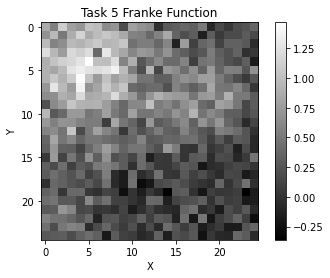

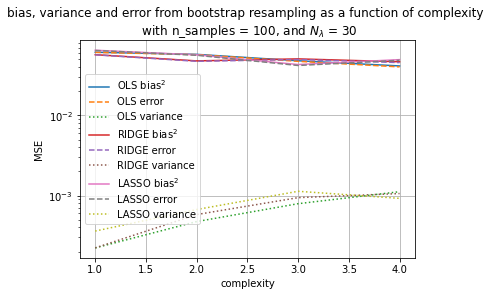

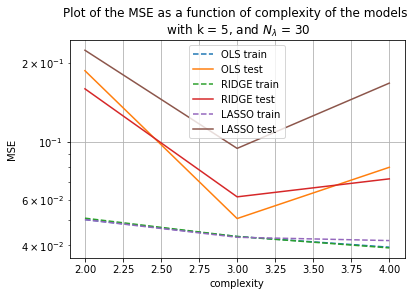

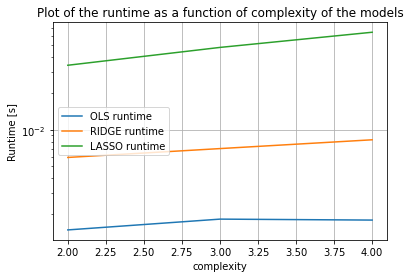

In [4]:
%run ../1project/task5.py

## Exercise 6:

In [ ]:
import pandas as pd
# Confidence interval
beta_ols_variance = sigma_N**2 * np.linalg.pinv(X_train.T @ X_train) #Calculates variance of beta
var_diag=np.diag(beta_ols_variance)
ci1 = ols_beta - 1.96 * np.sqrt(var_diag)/(X.shape[0])
ci2 = ols_beta + 1.96 * np.sqrt(var_diag)/(X.shape[0])
print('Confidence interval of β-estimator at 95 %:')
ci_df = {r'$β_{-}$': ci1,
         r'$β_{ols}$': ols_beta,
         r'$β_{+}$': ci2}
ci_df = pd.DataFrame(ci_df)
display(np.round(ci_df,3))#prec
print("––––––––––––––––––––––––––––––––––––––––––––")
